### 1. Importing necessary libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score
)
from utils.utils import plot_confusion_matrix, generate_tensor

from crack_segmentation.subroutines.loss_metrics import (
    Weighted_Cross_Entropy,
    F1_score,
    Precision_dil,
    F1_score_dil
)

### 2. Loading the dataset

In [2]:
dataset = pd.read_csv('../dataset/dataset.csv')

test_df = dataset.sample(frac=1.0, random_state=42)
test_data = generate_tensor(test_df, image_size=(224,224), class_mode='categorical')

Found 480 validated image filenames belonging to 2 classes.


### 3. Loading the Unet-MobileNet model

In [3]:
model = tf.keras.models.load_model(
    'models/trained/unet_mobilenet.h5',
    custom_objects={
        'loss': Weighted_Cross_Entropy(10),
        'F1_score': F1_score,
        'F1_score_dil': F1_score_dil,
        'Precision_dil': Precision_dil
    }
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 32)         864       ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)         128       ['conv1[0][0]']               
 on)                                                                                          

### 4. Making predictions

In [4]:
y_pred = np.argmax(model.predict(test_data), axis=-1).astype(np.uint8)

15/15 [==============================] - 192s 13s/step


#### 4.1. Classification report

In [5]:
cr = classification_report(test_data.labels, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       240
           1       1.00      0.91      0.95       240

    accuracy                           0.95       480
   macro avg       0.96      0.95      0.95       480
weighted avg       0.96      0.95      0.95       480


#### 4.2. F1, Precision and Recall Score

In [6]:
x = f1_score(test_data.labels, y_pred,)
y = precision_score(test_data.labels, y_pred)
z = recall_score(test_data.labels, y_pred)

In [7]:
print(f'F1 Score: {round(x*100,2)}%')
print(f'Precision Score: {round(y*100,2)}%')
print(f'Recall Score: {round(z*100,2)}%')

F1 Score: 94.99%
Precision Score: 99.54%
Recall Score: 90.83%


#### 4.3. Confusion matrix

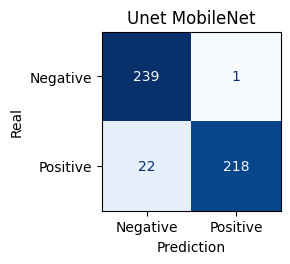

In [8]:
disp = plot_confusion_matrix(test_data.labels, y_pred, title='Unet MobileNet')

plt.show()

### 4. Evaluating the model

In [9]:
loss, acc = model.evaluate(test_data)

15/15 [==============================] - 186s 12s/step - loss: 2.9414 - accuracy: 0.9521


In [10]:
print(f'acc: {round(acc*100,2)}%')
print(f'loss: {loss}' )

acc: 95.21%
loss: 2.941413164138794
